<font color=red><p style="font-size:25px;text-align:center"><b>Ad Click Prediction</b></p></font>

<h4><font color=blue>Motivation</font></h4>

- The main motivation behind the project is “Targeted Advertising”. At its most basic, targeted advertising can just mean that ads are chosen for their relevance to site content, in the assumption that they will then be relevant to the site audience as well. Online advertisers can use different methods to target a particular advertisement on the user based on its traits. Most of company do this as part of social media like Facebook, LinkedIn etc. But most of the times the process goes wrong and the advertisement does not reach its target audience because it is sent out without actually understanding the probability of the occurring click.

<h4><font color=blue>Problem Statement</font></h4>

- In this article, we will work with the advertising data of a marketing agency to develop a machine learning algorithm that predicts if a particular user will click on an advertisement. The data consists of 10 variables: 'Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country', Timestamp' and 'Clicked on Ad'.

- The main variable we are interested in is 'Clicked on Ad'. This variable can have two possible outcomes: 0 and 1 where 0 refers to the case where a user didn't click the advertisement, while 1 refers to the scenario where a user clicks the advertisement.

- We will see if we can use the other 9 variables to accurately predict the value 'Clicked on Ad' variable. We will also perform some exploratory data analysis to see how 'Daily Time Spent on Site' in combination with 'Ad Topic Line' affects the user's decision to click on the add.


The goal is to predict if a user would click on an advertisement based on the features of the user. Few assumptions made as a part of this project is:

1. User taken into consideration are between the age group of 19 to 61.
2. There is almost equal ratio of male and female internet users.
3. The ad topic is limited to what is given in the dataset.


<h4><font color=blue>Data Set</font></h4>

The dataset consists of below features:

- **Daily Time Spent on Site:** Consumer time on site in minutes

- **Age:** Customer age in years

- **Area Income:** Average Income of geographical area of consumer

- **Daily Internet Usage:** Average minutes a day consumer is on the Internet

- **Ad Topic Line:** Headline of the advertisement

- **City:** City of consumer

- **Male:** Whether or not consumer was male ~ 0 - Female / 1 - Male

- **Country:** Country of consumer

- **Timestamp:** Data and time

- **Clicked on Ad:** 0 - Not clicked on Ad / 1 - Clicked on Ad

<h3><font color=gren>Loading and Reading Data</font></h3>

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [1]:
data = pd.read_csv("D:/Case Studies/Ad Click Prediction/advertising.csv")

In [2]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [23]:
print("NUMBER OF DATA POINTS -",data.shape[0])
print("NUMBER OF FEATURES -",data.shape[1])
print("FEATURES -",data.columns.values)

NUMBER OF DATA POINTS - 1000
NUMBER OF FEATURES - 10
FEATURES - ['Daily Time Spent on Site' 'Age' 'Area Income' 'Daily Internet Usage'
 'Ad Topic Line' 'City' 'Male' 'Country' 'Timestamp' 'Clicked on Ad']


In [13]:
print("[QUESTION] ARE THERE ANY DUPLICATE RECORD PRESENT IN DATASET ?")
print("[ANSWER]",data.duplicated().sum())

[QUESTION] ARE THERE ANY DUPLICATE RECORD PRESENT IN DATASET ?
[ANSWER] 0


- As the value above is zero, there are no duplicates.

<h3>Determing the type of attributes in the given dataset :</h3>

**Categorical Features**
- Ad Topic Line
- City
- Male
- Country
- Clicked on Ad

**Numerical Features**
- Daily Time Spent on Site
- Age
- Area Income
- Daily Internet Usage

<h3><font color=gren>Exploratory Data Analysis</font></h3>

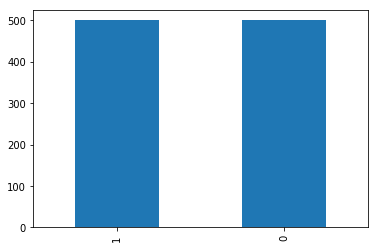

In [70]:
data['Clicked on Ad'].value_counts().plot.bar()

**<font color=blue>Which Gender Has Clicked More On Online Ads ?</font>**

In [29]:
data.groupby(['Male','Clicked on Ad'])['Clicked on Ad'].count().unstack()

Clicked on Ad,0,1
Male,,
0,250,269
1,250,231


- Based on above data we can see that a greater number of females have clicked on ads as compared to males.

**<font color=blue>Maximum Number of Internet Users Belong to Which Country In The Given Dataset ?</font>**

In [30]:
pd.crosstab(index=data['Country'],columns='count').sort_values(['count'], ascending=False)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
...,...
Montserrat,1
Mozambique,1
Romania,1


**<font color=blue>Which Age Group Is Spending Maximum Time On The Internet ?</font>**

<Figure size 720x504 with 0 Axes>

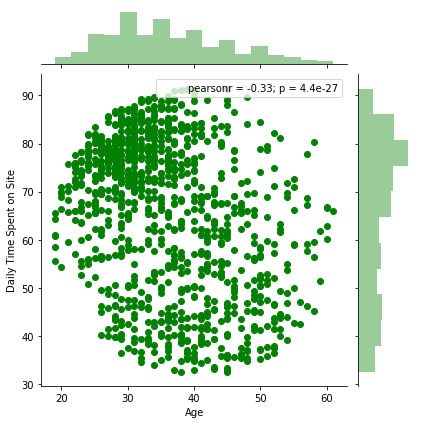

In [45]:
plt.figure(figsize=(10,7))
sns.jointplot(x='Age', y='Daily Time Spent on Site', color= "green", data=data)

- From the above plot its seems that the age group of 25-40 is most active on the internet.

**<font color=blue>What Age Group Does The Dataset Majorly Consist Of ?</font>**

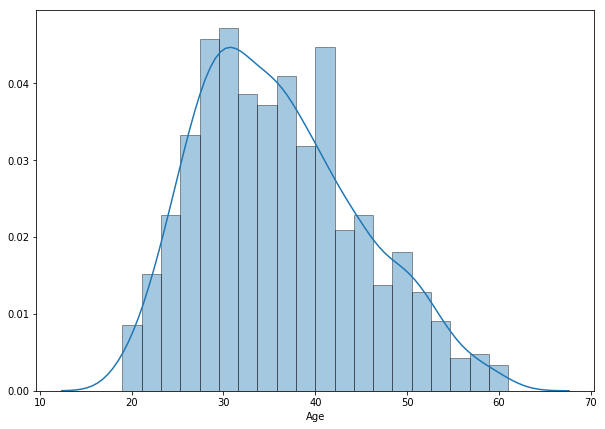

In [37]:
plt.figure(figsize=(10,7))
sns.distplot(data['Age'], bins = 20, kde=True, hist_kws=dict(edgecolor="k", linewidth=1))

- Here, we can see that most of the internet users are having age in the range of 26 to 41 years.

In [38]:
print("AGE OF THE OLDEST PERSON -",data['Age'].max(),'YEARS')
print("AGE OF THE YOUNGEST PERSON -",data['Age'].min(), 'YEARS')
print("AVERAGE AGE IN DATASET -",data['Age'].mean(), 'YEARS')

AGE OF THE OLDEST PERSON - 61 YEARS
AGE OF THE YOUNGEST PERSON - 19 YEARS
AVERAGE AGE IN DATASET - 36.009 YEARS


**<font color=blue>What Is The Income Distribution In Different Age Groups ?</font>**

<Figure size 720x504 with 0 Axes>

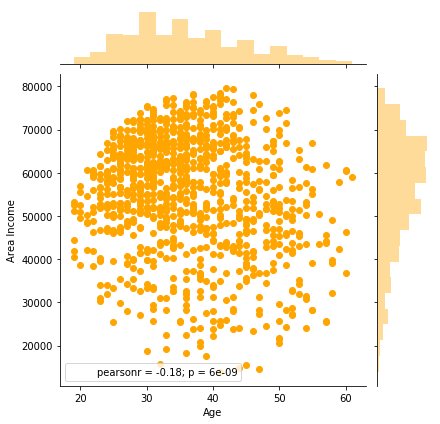

In [43]:
plt.figure(figsize=(10,7))
sns.jointplot(x='Age', y='Area Income', color= "orange", data=data)

- Here, we can see that mostly teenagers are higher earners with age group of 20-40 earning 50k-70k.

**<font color=blue>What Is The Relationship Between Different Features ?</font>**

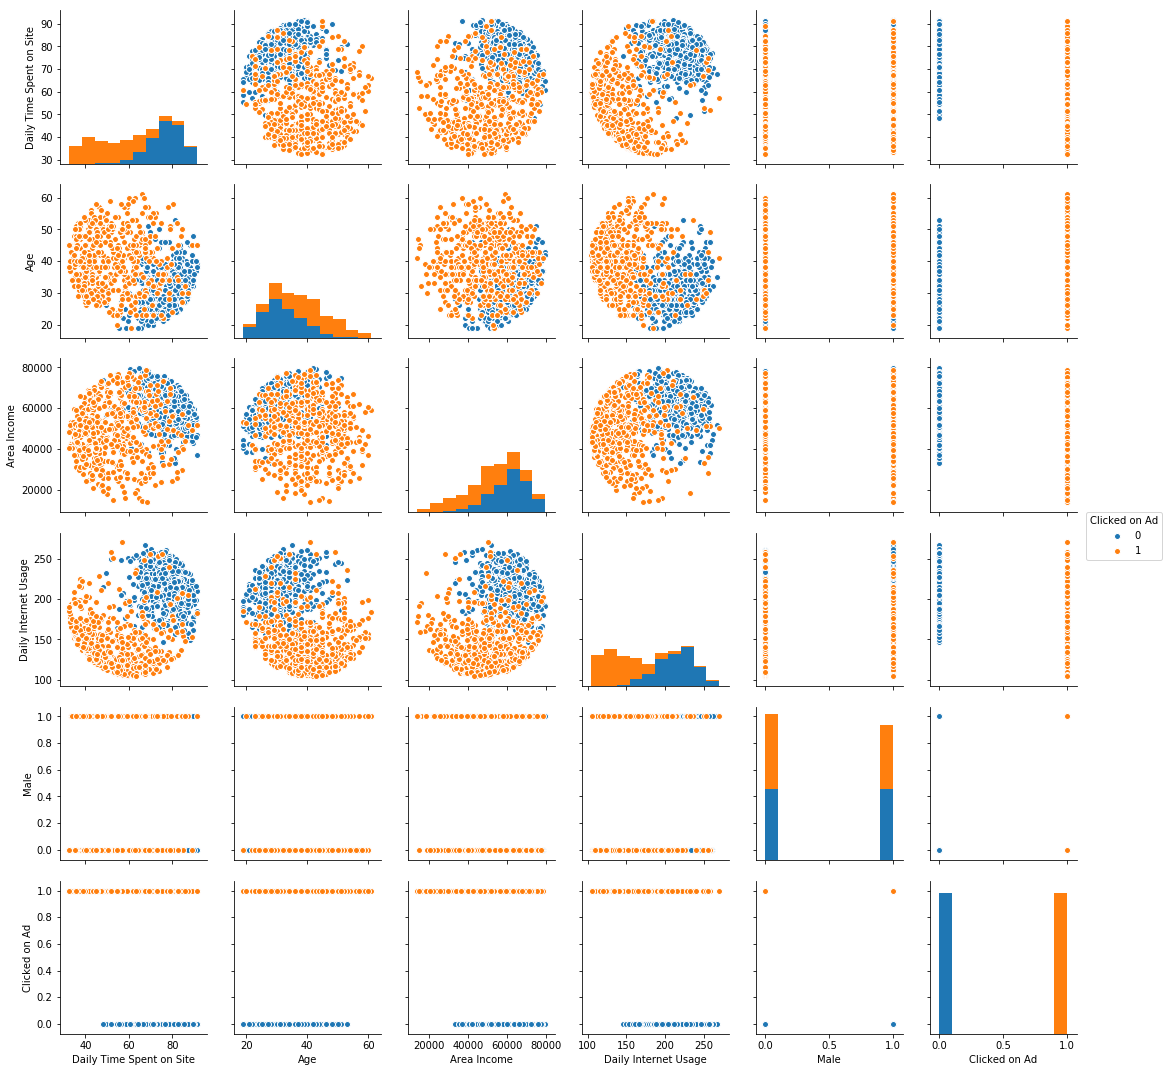

In [63]:
sns.pairplot(data, hue='Clicked on Ad')

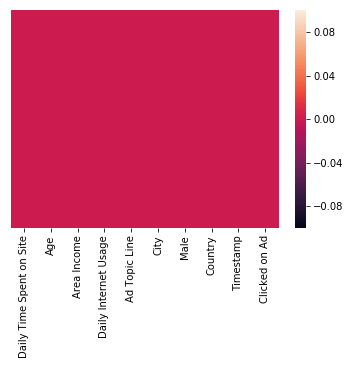

In [64]:
sns.heatmap(data.isnull(), yticklabels=False)

- As we see, we don't have any missing data.

- Considering the 'Ad Topic Line', we decided to drop it. In any case, if we need to extract any form of interesting data from it, we can use Natural Language Processing.

- As to 'City' and the 'Country', we can supplant them by dummy variables with numerical features, along these lines we got such a large number of new highlights.

- Another methodology would be thinking about them as a categorical features and coding them in one numeric value.

- Changing 'Timestamp' into numerical value is more complicated. So, we can change ‘Timestamp’ to numbers or convert them to spaces of time/day and consider it to be categorical and afterwards we converted it into numerical values. And we select the month and the hour from the timestamp as features.

In [65]:
data['City Code'] = data['City'].astype('category').cat.codes

data['Country Code'] = data['Country'].astype('category').cat.codes

In [66]:
data[['City Code','Country Code']].head(5)

,City Code,Country Code
0,961,215
1,903,147
2,111,184
3,939,103
4,805,96


In [67]:
data['Month'] = data['Timestamp'].apply(lambda x: x.split('-')[1])

data['Hour'] = data['Timestamp'].apply(lambda x: x.split(':')[0].split(' ')[1])

In [68]:
data[['Month','Hour']].head(5)

,Month,Hour
0,03,00
1,04,01
2,03,20
3,01,02
4,06,03


In [72]:
result_X = data.drop(labels=['Ad Topic Line','City','Country','Timestamp','Clicked on Ad'], axis=1)

result_Y = data['Clicked on Ad']

**<font color=gren><h3>Machine Learning Models</h3></font>**

**<font color=blue><h4>Random Train Test Split (70:30)</h4></font>**

In [75]:
#train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(result_X, result_Y, test_size=0.3, random_state = 42)

In [76]:
print("NUMBER OF DATA POINTS IN TRAIN DATA: ",X_train.shape)
print("NUMBER OF DATA POINTS IN TEST DATA: ",X_test.shape)

NUMBER OF DATA POINTS IN TRAIN DATA:  (700, 9)
NUMBER OF DATA POINTS IN TEST DATA:  (300, 9)


In [77]:
from collections import Counter

print("-"*10, "DISTRIBUTION OF OUTPUT VARIABLE IN TRAIN DATA", "-"*10)
train_distr = Counter(Y_train)
train_len = len(Y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len,"\n")

print("-"*10, "DISTRIBUTION OF OUTPUT VARIABLE IN TEST DATA", "-"*10)
test_distr = Counter(Y_test)
test_len = len(Y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- DISTRIBUTION OF OUTPUT VARIABLE IN TRAIN DATA ----------
Class 0:  0.5057142857142857 Class 1:  0.4942857142857143 

---------- DISTRIBUTION OF OUTPUT VARIABLE IN TEST DATA ----------
Class 0:  0.5133333333333333 Class 1:  0.5133333333333333


<h3><font color=blue>Implementing Logistic Regression Model</font></h3>

In [94]:
from sklearn.linear_model import LogisticRegression

logistic_reg_model = LogisticRegression()

logistic_reg_model.fit(X_train, Y_train)

LogisticRegression()

In [95]:
logistic_reg_pred = logistic_reg_model.predict(X_test)

In [97]:
from sklearn.metrics import accuracy_score

logistic_reg_accuracy = accuracy_score(logistic_reg_pred, Y_test)
print(round(logistic_reg_accuracy*100, 2))

90.67


<h3><font color=blue>Implementing Naive Bayes Model</font></h3>

In [98]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(X_train, Y_train)

GaussianNB()

In [100]:
nb_pred = nb_model.predict(X_test)

nb_accuracy = accuracy_score(nb_pred, Y_test)
print(round(nb_accuracy*100, 2))

96.0


<h3><font color=blue>Implementing Decision Tree Model</font></h3>

In [101]:
from sklearn.tree import DecisionTreeClassifier

dec_tree_clf = DecisionTreeClassifier()

dec_tree_clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [103]:
dt_pred = dec_tree_clf.predict(X_test)

dt_accuracy = accuracy_score(dt_pred, Y_test)
print(round(dt_accuracy*100, 2))

93.67


<h3><font color=red>Conclusion</font></h3>

- Comparing All The Above Implementation Models, We Conclude That The Naive Bayes Algorithm Gives Us The Maximum Acuuracy.